In [1]:
import numpy as np
import mlgrad.model as model
import mlgrad.loss as loss
import mlgrad.func as func
import mlgrad.risk as risk
import mlgrad.avragg as avragg
# import mlgrad.gd as gd
import mlgrad.regnorm as regnorm
import mlgrad.weights as weights
from mlgrad.utils import array_exclude_outliers

import mlgrad.regr as regr
import mlgrad.clsfy as clsfy

from mlgrad import averager_it, averager_fg, fg, erm_fg, sg, erm_sg, irgd, erm_irgd, erisk, mrisk

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook', 'seaborn-ticks'])

import sys
print(sys.version)

3.9.2 (default, Feb 28 2021, 17:03:44) 
[GCC 10.2.1 20210110]


In [2]:
anames = [('a%s' % i) for i in range(1,35)]
df = pd.read_csv("data/ionosphere.data", sep=',', names=anames+['cls'])

In [3]:
len(df)

351

In [4]:
df

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a26,a27,a28,a29,a30,a31,a32,a33,a34,cls
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,-1
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,-1
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


In [5]:
X = np.c_[tuple(df[name] for name in anames)]
X = np.asarray(X, dtype='d')
Y = df["cls"].values
Y = np.asarray(Y, dtype='d')

# X -= np.median(X)
# Y -= np.median(Y)

# x_min, x_max = X.min(), X.max()
# X = (X - x_min) / (x_max - x_min)
# y_min, y_max = Y.min(), Y.max()
# Y = (Y - y_min) / (y_max - y_min)

Xs = X

# X0 = np.linspace(X.min(), X.max(), 20)

n = len(anames)
print(Xs.shape)

(351, 34)


In [6]:
from sklearn.preprocessing import scale

In [7]:
# loss_func_h = loss.MarginLoss(func.Hinge())
# loss_func_rsq = loss.RelativeErrorLoss(func.Square())
# loss_func_abs = loss.ErrorLoss(func.Absolute())

In [8]:
# sqr_norm = regnorm.SquareNorm()

In [9]:
mod_svm = model.LinearModel(n)
mod_svm.init()

[0.25616861 0.20772138 0.93235367 0.04801034 0.7011313  0.13767516
 0.75676653 0.43851366 0.35926466 0.75079914 0.8113924  0.72124294
 0.64731022 0.87015119 0.18749231 0.93693386 0.54195831 0.53817369
 0.10155088 0.61014114 0.21740542 0.24699807 0.5887753  0.00700992
 0.97539312 0.52505197 0.50826857 0.2997125  0.4557851  0.70804401
 0.86596848 0.26530391 0.4513028  0.82078701 0.65791575] 35


K=1500 param=[-0.69484516 -0.23334772  0.93235367  0.72145354  0.55915036  0.60885508
  0.90482036  0.27422007  0.89679541  0.15421554  0.17995413 -0.05987696
  0.00288214  0.1404222   0.21806688  0.43645096 -0.06615357 -0.03740126
  0.2648502   0.20265391 -0.39164939  0.15790293 -0.43748995  0.1330025
 -0.04060829  0.05543489  0.35702734 -0.65371882  0.07726445  0.04941703
  0.1741145   0.40118926 -0.29666352  0.00479168 -0.42756295]


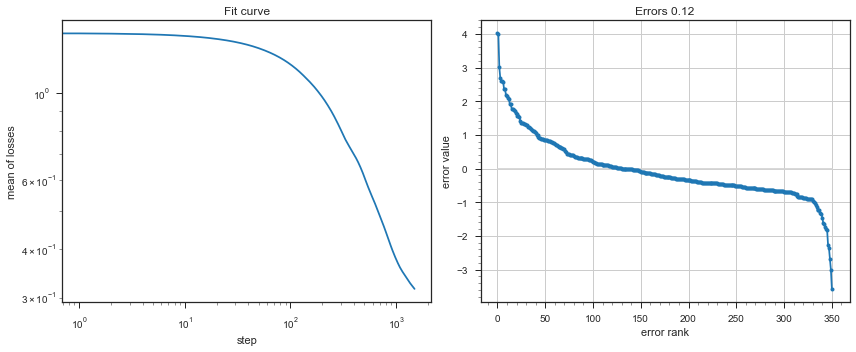

In [10]:
alg_svm = clsfy.classification_as_regr(Xs, Y, mod_svm, n_iter=1500, verbose=1)
err_ls = clsfy.plot_losses_and_errors(alg_svm, Xs, Y)

In [11]:
mod_svm_wm = model.LinearModel(n)
mod_svm_wm.init()

[0.23149231 0.68447035 0.47493046 0.45010182 0.13796554 0.17636849
 0.78798722 0.44517916 0.57601378 0.19196688 0.4550939  0.49108681
 0.60803365 0.82580657 0.03844879 0.45789806 0.40539274 0.33248981
 0.14663728 0.64260433 0.35000176 0.65715363 0.38041247 0.05700031
 0.96866209 0.37520286 0.79458581 0.9477381  0.7493266  0.40872304
 0.02537871 0.66883555 0.89103564 0.42818078 0.20235367] 35


K=100 param=[-8.49643394  6.22179728  0.47493046  1.9228142  -1.34134009  4.4837384
  2.34102817  2.46345561  2.49887519  0.80526185  3.23116781 -1.37200298
 -0.41065733 -1.76072645 -0.94916338  2.58835275 -2.89964213 -0.32355573
  1.75219943 -1.97290611 -1.10266759 -0.26347731 -2.87101001  1.29960311
 -1.20973673  2.88265511  1.86002099 -7.41498359  6.34441665 -1.03702417
  4.43744493  1.16817503 -4.10531139  3.18081435 -4.07776156]


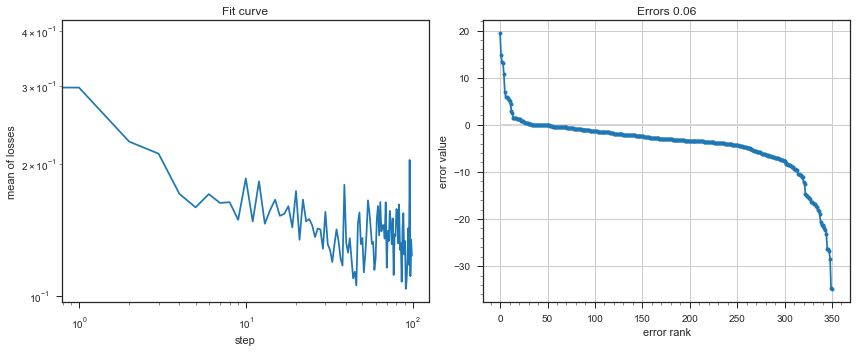

In [12]:
avg_svm_wm = regr.averaging_function('WM', rhofunc=func.Quantile_Sqrt(0.96, 0.001))
alg_svm_wm = clsfy.classification_as_mregr(Xs, Y, mod_svm_wm, avrfunc=avg_svm_wm, 
                                           h=0.001, n_iter2=100, verbose=1)
err_svm_wm = clsfy.plot_losses_and_errors(alg_svm_wm, Xs, Y)